In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

```
conda activate TVB #여기에 저장됨
```

In [2]:
import bct
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import pingouin
import matplotlib.pyplot as plt

# importing and making packages관련 :
https://stackoverflow.com/a/9049246/9042297  : 왜 (처음에) import utils 한 후에 utils.load_data하면 바로 안되는지(no package found라고 뜸)
* solutions : 
    1. `__init__.py`안에다가, `from .import load_data`라고 해야한다 $\rightarrow{}$ 나는 이걸 썼다
    2. 또는, `import utils.load__data`라고, 직접 importing할때 reference 해도 된다(단 이러면 여러개 import해야할때 귀찮아짐)



# 0. Importing Module/Data

In [3]:
#####IMPORTING utils module#####
## so that we can import from one directory above's utils
#https://blog.finxter.com/python-how-to-import-modules-from-another-folder/
sys.path.append("/scratch/connectome/TVB/TVB_RESEARCH")
sys.path

['/scratch/connectome/TVB/TVB_RESEARCH/Brain_Connectivity',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/connectome/dyhan316/.local/lib/python3.8/site-packages',
 '/scratch/connectome/dyhan316/TVB/TVB_showcase/virtual_aging_showcase_copy/virtual_ageing',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/scratch/connectome/TVB/TVB_RESEARCH']

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
#####IMPORTING dataset/metadata and so on#####
data_dir = '/storage/bigdata/ABCD/TVB/data'
import utils #now imports becasue it looks at the last added sys path

dataset = utils.load_data.ABCDDataset(data_dir)  #이제 된다
subjects = dataset.list_subjects()
meta_data = utils.load_metadata.metadata(data_dir)

In [5]:
##looking at some examples
sample_sub = subjects[0]
print(subjects[:10])
print(dataset.load_sc(sample_sub).shape)   # load SC
print(dataset.load_bold(sample_sub).shape) # load BOLD
print(dataset.parcellation_100()) #the node names
meta_data.head()

['NDARINV0X4A2LKW', 'NDARINVRERRA7FD', 'NDARINV43M1L7PL', 'NDARINV6WH2N8P4', 'NDARINVFKFN7X0T', 'NDARINVYJETWGU1', 'NDARINVNUNMDE7M', 'NDARINVPUEXNZJU', 'NDARINVCYA7HWRK', 'NDARINVPXYXMXTH']
(84, 84)
(370, 84)
['L-AC', 'L-AM', 'L-BSTS', 'L-CA', 'L-CACG', 'L-CER', 'L-CMFG', 'L-CU', 'L-EC', 'L-FG', 'L-FP', 'L-HI', 'L-ICG', 'L-IN', 'L-IPG', 'L-ITG', 'L-LG', 'L-LOFG', 'L-LOG', 'L-MOFG', 'L-MTG', 'L-PA', 'L-PCAL', 'L-PCG', 'L-PCU', 'L-PHIG', 'L-POP', 'L-POR', 'L-PTR', 'L-PU', 'L-PaCG', 'L-PoCG', 'L-PrCG', 'L-RACG', 'L-RMFG', 'L-SFG', 'L-SMG', 'L-SPG', 'L-STG', 'L-TH', 'L-TP', 'L-TTG', 'R-AC', 'R-AM', 'R-BSTS', 'R-CA', 'R-CACG', 'R-CER', 'R-CMFG', 'R-CU', 'R-EC', 'R-FG', 'R-FP', 'R-HI', 'R-ICG', 'R-IN', 'R-IPG', 'R-ITG', 'R-LG', 'R-LOFG', 'R-LOG', 'R-MOFG', 'R-MTG', 'R-PA', 'R-PCAL', 'R-PCG', 'R-PCU', 'R-PHIG', 'R-POP', 'R-POR', 'R-PTR', 'R-PU', 'R-PaCG', 'R-PoCG', 'R-PrCG', 'R-RACG', 'R-RMFG', 'R-SFG', 'R-SMG', 'R-SPG', 'R-STG', 'R-TH', 'R-TP', 'R-TTG']


,Age,height,weight,BMI,vol,Sex,Education,income,married,race.ethnicity,abcd_site,morsex.1,morsex.2,ctsex.1,ctsex.2,morctsex.1,morctsex.2
ID_HBP,,,,,,,,,,,,,,,,,
NDARINVEFCVZYTR,130,56.500,118.000000,25.986060,1433652.836,Male,18,1,1,1,19,0.364884,0.635116,0.897505,0.102495,0.859503,0.140497
NDARINVJHX361ZP,119,51.875,65.333333,17.067658,1552107.042,Female,18,9,3,1,20,0.015770,0.984230,0.087163,0.912837,0.039306,0.960694
NDARINVNY4HU8H1,114,54.500,94.750000,22.425469,1600464.137,Female,18,10,3,1,9,0.214075,0.785925,0.792755,0.207245,0.050093,0.949907
NDARINV22C4YKXN,111,51.000,50.500000,13.649173,1423327.367,Female,18,10,1,1,9,0.185170,0.814830,0.596674,0.403326,0.455478,0.544522
NDARINVVX605DH1,114,52.750,70.000000,17.685137,1474259.573,Female,18,7,1,1,16,0.004610,0.995390,0.003111,0.996889,0.002103,0.997897


**soft warning**
1. BOLD data is not well registered (desikan killiany atlas이면) => new ROI extraction needed
    * 상윤쌤 said some nii didn't work => 어떻게 할지 모르겠다.. (talk later?)
2. ID_HBP, but not HBP (ABCD) (some naming missing, but didn't care ot change)

# 1. Brain Connectivity Measures (BCT) 써서 하기

참고 : 상윤쌤의 코드 보면 도움됨

# X.X (numbering 나중에 고려하기)어떤 module들이 있고, 어느 것들을 implement해서 볼까?

implement할떄, 
> https://sites.google.com/site/bctnet/list-of-measures
여기에 있는 것들 쓰면 됨!!!


(function 이름이 bctpy랑 똑같다 (뒤에 .m extensino만 없에면)

(실제로 module내에서 뭐가 되어있는지 보고 싶으면 밑의 것들을 하면 된다)
```
help(bct) #help on the module itself
dir(bct) # lists all possible functions
help(bct.degrees_und) #실제 있는 하나의 functino중 하나봄
```

```
help(bct.modularity) #이거보면 사실 modularity종류가 엄청 많은 듯...?
#이거 이해하려면 => modularity 이론 공부를 더 해야함
```


## 주의하기!! : bold의 경우, bold 가 아닌 FC를 만들어서 거기서 bct의 함수들을 써야한다! (다른 matrix도 넣어보기?) (or FCD?)
* 이것을 FC folder을 따로 만들어서 거기서 뽑아서 쓸지, 아니면 돌릴떄마다 FC를 구하게 할지 두가지중 하나로 선택해야 할듯
    * 아마도 첫번째를 해야할듯 (기존의 storage folder에 있던 그 data folder에 subject 별로 새로운 FC_REAL folder 을 추가한 후, `load_data.py`의 method 중 하나로 넣어야 할듯(?))
    * 첫번째 해야하는 이유는, FC 계산할때마다 시간 거림


근데 생각해보니, FCD는 `load_data.py`처럼, 따로 `analysis.py`라든지 같은 sepearte module화 해야할듯 (bct에서 구현 안된거를 jupyter 에다가 구현하는 것은 일을 두번 하는 것이니)(아니면 `FCD.py`만들어서 거기다가 FCD 종류들 다 때려넣기?? ㅋㅋ)


## BCT 결과 어떻게 저장(정리?)
* 일단 `compute_bct_measures`라는 class로 만들어서 했다
BCT output이 크게 scalar, vector, matrix가 나올텐데, 이들을 
* scalar 끼리 묵기, => matrix (one row of scalar properties per person) => or 사람별로 file저장?
* vector끼리 묵기 (즉, degree 같은 1D들은 그들끼리 묶기) => rank4 tensor (or 사람별로 folder저장?)
* matrix끼리 묶기
이렇게 세개로 각각 묶어서 따로 저장하기!
   

## 1.1. 일단 `conn_measures.py`라는 모듈에 넣은 `compute_bct_measures`를 (sample)로 가져오자

# 0~1로 min/maxing을 한 후에 했다! (__init__내에서 min/maxing을 함)
(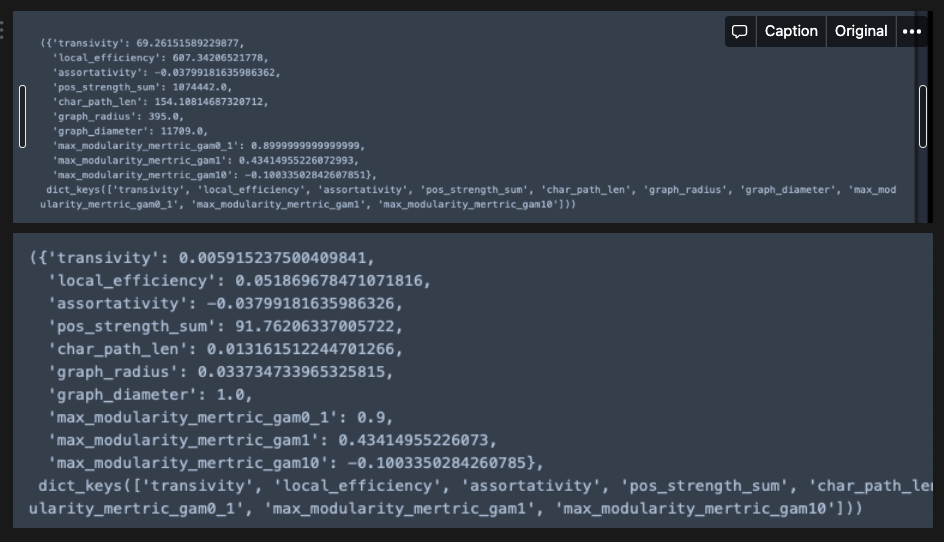) 여기서 보듯이, 0~1 minmaxing하냐 마냐에 따라 값이 다른 아이들도 있다

In [6]:
#####testing stuff out####

#checking shape
sample_sc = dataset.load_sc(sample_sub)
threshold = 0.3

#data, names = utils.conn_measures.compute_bct_UW(sample_sc).scalar_properties()
#data, names = utils.conn_measures.compute_bct_UW(sample_sc).vector_properties()
data, names = utils.conn_measures.compute_bct_UW(sample_sc, threshold = threshold).matrix_properties()

print([data[i].shape for i in names])
print(names)
#samples
sample_i = utils.conn_measures.compute_bct_UW(sample_sc, threshold = threshold)
sample_i.scalar_properties()

[(84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84), (84, 84)]
dict_keys(['threshold_normalized_matrix', 'agreement', 'mean_first_passage_time', 'dist_mat', 'num_edge_shortest_path', 'shortest_path_len', 'num_edges_shortest_path', 'Pmat', 'edge_btw_mat'])


/home/connectome/dyhan316/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


({'transivity': 0.017291674596566046,
  'local_efficiency': 0.051869678471071816,
  'assortativity': -0.04198176665386144,
  'pos_strength_sum': 90.85421470663593,
  'char_path_len': 26.67143124847424,
  'global_efficiency': 0.051869678471071816,
  'graph_radius': 46.4280802241356,
  'graph_diameter': 88.83905322888917,
  'max_modularity_mertric_gam0_1': 0.9000000000000001,
  'max_modularity_mertric_gam1': 0.46764311250970314,
  'max_modularity_mertric_gam10': -0.12585161358739794},
 dict_keys(['transivity', 'local_efficiency', 'assortativity', 'pos_strength_sum', 'char_path_len', 'global_efficiency', 'graph_radius', 'graph_diameter', 'max_modularity_mertric_gam0_1', 'max_modularity_mertric_gam1', 'max_modularity_mertric_gam10']))

## 1.2. Either loop through all the subjects or sth and SAVE THE RESULTS (code this)
=> 아니면, 굳이 저장안해도 되려나? 어차피 compute하는데 시간도 별로 안걸리는데

In [14]:
keys = ['char_path_len', 'global_efficiency', 'graph_radius', 'graph_diameter']
data_dict = dict(zip(keys, bct.charpath(data["threshold_normalized_matrix"])))

/home/connectome/dyhan316/.local/lib/python3.8/site-packages/bct/algorithms/distance.py:157: RuntimeWarning: divide by zero encountered in true_divide
  efficiency = np.mean(1 / Dv)


In [30]:
for i in zip(keys, bct.charpath(data["threshold_normalized_matrix"])):
    print(i)
print(dict(zip(keys, bct.charpath(data["threshold_normalized_matrix"]))))

('char_path_len', 0.013031298724417087)
('global_efficiency', inf)
('graph_radius', array([0.08497737, 0.0797677 , 0.24844137, 0.26834059, 0.23221454,
       0.37125288, 0.25962934, 0.3094201 , 0.0797677 , 0.38201384,
       0.06140576, 0.22478435, 0.2101802 , 0.16414724, 0.416261  ,
       0.43522077, 0.22444274, 0.40729353, 0.38201384, 0.23247075,
       0.43522077, 0.10923221, 0.31454437, 0.08702707, 0.47928944,
       0.22478435, 0.1595354 , 0.21897686, 0.21436502, 0.26834059,
       0.36706807, 0.31650867, 0.36706807, 0.09590913, 1.        ,
       1.        , 0.416261  , 0.47928944, 0.24844137, 0.30694338,
       0.05406098, 0.14407721, 0.09300538, 0.05679392, 0.13570758,
       0.25467589, 0.21111965, 0.37125288, 0.35955248, 0.31334871,
       0.05679392, 0.29344948, 0.10667008, 0.13459732, 0.17636006,
       0.14219831, 0.52395593, 0.31053036, 0.27739346, 0.24938082,
       0.52395593, 0.20283543, 0.31053036, 0.10163122, 0.31334871,
       0.08506277, 0.53095909, 0.12921684, 0.

In [31]:
{
    "haha": 3.5,    
    dict(zip(keys, bct.charpath(data["threshold_normalized_matrix"])))
}

SyntaxError: invalid syntax (2227721288.py, line 4)

# 2. Looking at the corrleation betewen BCT results and 

## 2.1 BCT scalar vs metadata corrleation (ALSO ADD THE PHENOTYPE THING TOO)

http://localhost:11111/notebooks/TVB/virtual_aging_brain/notebooks/01_vab_github_sc_investigation.ipynb

여기것을 많이 배끼자!~! 
also, 
https://pingouin-stats.org
여기 많이보기! 
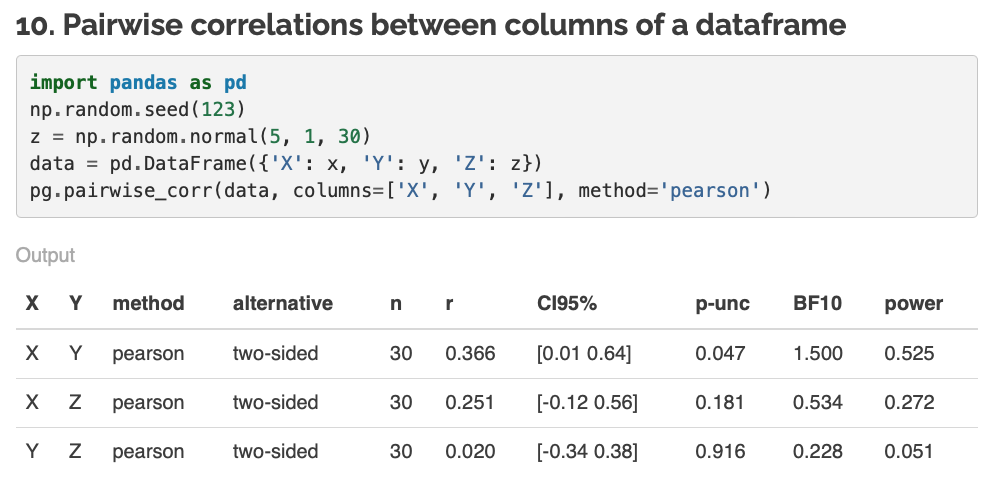


## 우리가 무엇을 쓸지
1. PARTIAL CORRELATION : 이게 VAB에서 쓰인다 (with sex and educaiton as covaraince)(웹사이트에 이론이 잘 나와있다)
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr
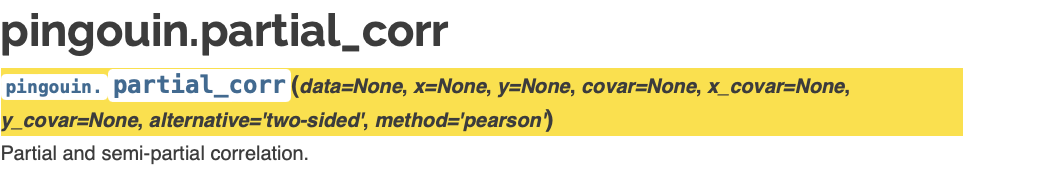

2. 1.을 matrix로 한꺼번에 하기 => use `pcorr()`쓰기 (partial correlation 만 나오고, p-value등도 안나오고 값이 robust하지 않다고 하지만, 일단 first filter역할로 한 후에, pair후보를 정하게 되면 그것에 대해서 위의 제대로된 값 구하는 것을 하자(with the p value and stuff))
https://pingouin-stats.org/generated/pingouin.pcorr.html#pingouin.pcorr
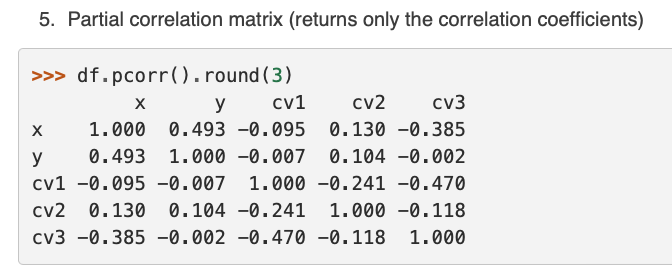

3. rcorr()도 있다는데 이거는 pcorr랑 뭐가 다른거지? 둘 중 뭐를 써야하지? (실제로 값을 구해서 비교해보기...?)
https://pingouin-stats.org/generated/pingouin.rcorr.html#pingouin.rcorr
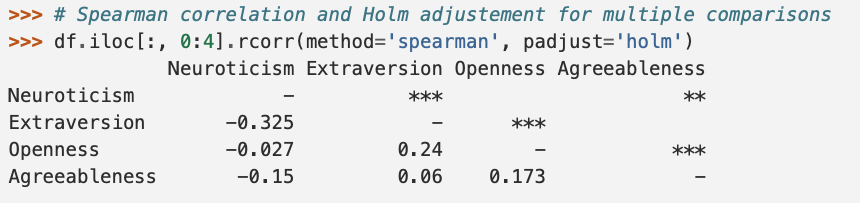


## 즉, 내가 생각하는 workflow: 
0. metadata(phenotypedata)와 BCT results dataframe을 concatenate하기
1. `pcorr()`를 써서 (BCT ersults와 phenotype 간의만(not within BCT too) 일단 변수들 간의 rough corrleation 값들을 보기
2. 그중 값이 큰 몇 pair를 정한 다음에, 그 후보 variable pair들간에 제대로된 partial correlation (with p-value and so on)을 행하기
> with education and sex as covariances
3. 그중 p-value < 0.05인 변수들에 대해서만, VAB예시에서 보듯이, `sns.regplot()`을 하기
> 4. **꼮!!!! 기존 논문들을 보고 거기서 (실제로 develop와 관련되어있따는 변수들을 찾아서) github에서 복붙하든지 해서 tool들을 더 가져와서 보기(즉, 기존 논문 driven 후보들을 두기)**

In [7]:
###how much to keep
sample_size = 30 #8238 if you wanna run all

##scalar meausres correlation
sample_sub = dataset.load_sc(subjects[0])
data, names = utils.conn_measures.compute_bct_UW(sample_sub).scalar_properties()

num_sub = len(subjects) #8238
num_measures = len(names)
scalar_bct_results = np.zeros((min(num_sub,sample_size),num_measures))

###SC + SCALAR (vector, matrix는 할지말지, 그리고 한다면 언제할지는 모르겠다)
for i,sub in enumerate(subjects[:sample_size]):
    sub_sc = dataset.load_sc(sub)
    #do FC too!!!
    data, names = utils.conn_measures.compute_bct_UW(sub_sc).scalar_properties()
    scalar_bct_results[i] = np.array(list(data.values()))

total_scalar_results = pd.DataFrame(scalar_bct_results, index = subjects[:sample_size], columns = names)

TypeError: __init__() missing 1 required positional argument: 'threshold'

# BCT 할때, 0~1 min-maxing? 
# also, thresholding을 해서 binarize the thing so that we can use bianrized stuff
# score할대는 0~1사이에 0.1씩 했다고 함

In [ ]:
meta_data
#total_scalar_results.iloc[:,:2]

In [ ]:
##concateneate

all_together = pd.concat([total_scalar_results, meta_data[:sample_size]], axis = 1) #NaNs becuase subjects don't overlap => have to overlap them!
#do the aranging by the subject ID thing, then do concat 
#전체 subject하면 이런 문제가 없을 듯?

p_corr = pingouin.pcorr(all_together)


In [ ]:
p_corr = pingouin.pcorr(total_scalar_results)

p_corr.values[[np.arange(p_corr.shape[0])]*2] = 0 #change diagonal to zero

#(p_corr>0.8).index.tolist()
p_corr>0.8 
np.where(np.abs(p_corr)>0.8) #finds the coordinates of the things 

In [ ]:
p_corr>0.8
#p_corr

In [ ]:
pg             = pingouin.partial_corr(data=total_scalar_results.iloc[:,:2], x='transivity', y='local_efficiency')#, covar=['sex','edu'])
r_corr_sex     = pg["r"][0]
p_corr_sex     = pg["p-val"][0]


f,ax = plt.subplots(figsize=(5,5))
palette  = sns.color_palette("Set2", 12)

sns.regplot(x="transivity", y="local_efficiency", data=total_scalar_results.iloc[:,:2],scatter_kws={"s": 300,"edgecolor":'k','alpha':1},line_kws={"color":'k'},color=palette[10])
ax.set_title(f'r(%) ={r_corr_sex.round(4)*100}, pv = {p_corr_sex.round(9)}',fontsize=20);
# ax.set_title(r'$\rho(\%) =-45.3$, $p \leq 0.001$',fontsize=font_size);

In [ ]:
sns.pairplot(total_scalar_results, corner = True) 

In [ ]:
total_scalar_results

In [ ]:
help(bct.charpath)

In [ ]:
import numpy as np
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)
import pandas as pd
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson')
print(x.shape, y.shape, z.shape)

### also becareful of p-hack!

## LOOK AT (참조)

http://localhost:11111/notebooks/TVB/TVB_showcase/virtual_aging_showcase/virtual_ageing/notebooks/1_BNM_for_resting_state.ipynb
and http://localhost:11111/notebooks/TVB/REAL_RESEARCH/Brain_Connectivity/Stella_code_BCT.ipynb
and http://localhost:11111/notebooks/TVB/virtual_aging_brain/notebooks/01_vab_github_sc_investigation.ipynb (intra-SC masking and so on이 여기다가 구현되어있다)


* http://localhost:11111/tree/TVB/virtual_aging_brain/src : data.py, analysis.py등등에서 FCD이미 구현한 것들도 많다


# TODO
0. 논문읽고, 어떤 metric이 쓰였는지, 그리고 그런 논문들의 github을 가져와서든지 해서 우리만의 toolbox를 만들기
1. SINCE ABCD HAS TOO FMRI SESSIONS, BOTH MUST BE DONE!
2. ALSO, FMRI REGISTRATION ERROR해결해야함 (deskian atlas 쓸꺼면)
3. **cognitive scores** 추가하기 (지금은 morsex이런 것들 밖에 없는데 나중에 할꺼면 다 추가할 것 => 따라서, 모든 data가 필요하다!(cognitive data)
    * 이렇게 하기 위해서는 cognitive data가 있는 것을 따로 만들어야 한다
    * 근데, 이것을 metadata csv file을 바꿈으로서 만들기 보다는, 따로 "cognitive scores"라는 csv파일을 만들어서 거기다가 하자 (이렇게 나누는게 나중에 다루기 편할 듯)
    * 즉, 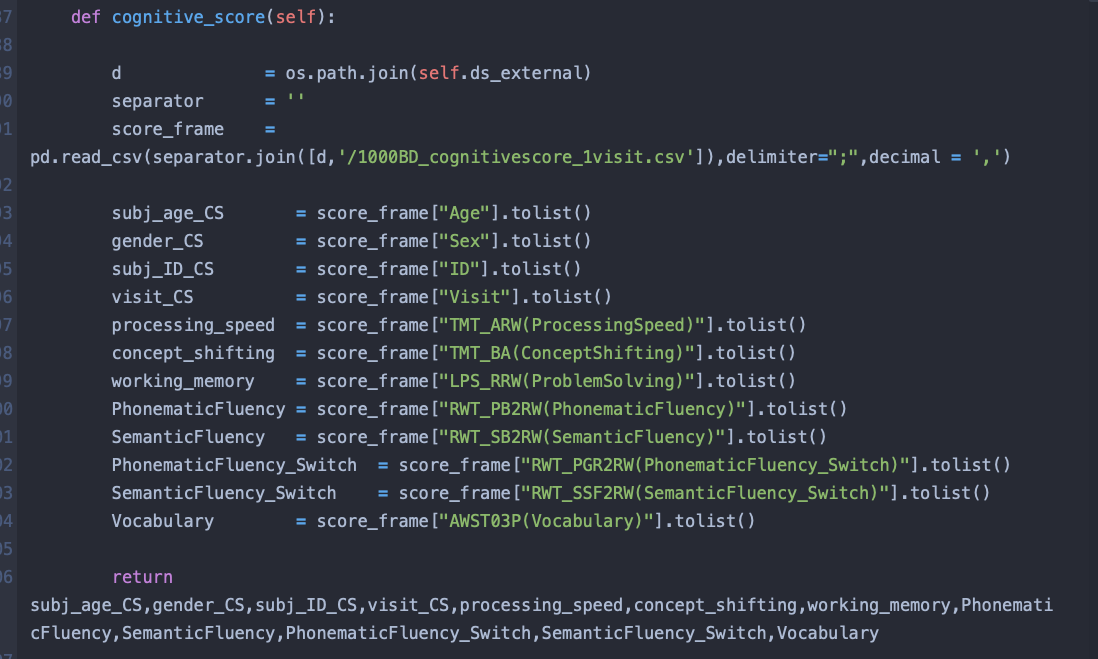 이 이미지 처럼, `pd.read_csv(separator.join([d,'/1000BD_cognitivescore_1visit.csv']),delimiter=";",decimal = ',')` 이런 `1000BD_cognitivescore_1visit.csv`를 따로 만들어서 거기서 쓰자 
> **<mark>(기존의 metadata csv를 더 길게 만들지 말고) 새로운 cogntiive score csv 만들기!</mark>**

* other todos : 이름을 바꾸기 (HBP, 100N4등등으로 썼는데, 사실은 desikan killiany고 ABCD 이고 그럼 (솔직히 function에는 큰 지장 없음)

## other todos (lower priority, but still has to be done)
1. parallel computing하는 것 implement하기 (using Unicore or sth)
2. rfmri session 2개 모두 하기 
    * 나중에 FCD할때 두개의 FCD를 평균내야함 (use more data)

## other things to note (warnings)

1. FC 폴더에 있는 두개는 사실 같은 거다 (원래는 atlas가 달라야 하는가 그런걸로 기억하는데 그렇지 않음)
    * 즉 밑의 사진에서, FC폴더밑에 있는 두 txt가 사실은 동일한 것! (아마도 내가 뭔지 몰라서 똑같게 했는 듯) 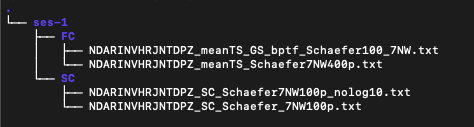
    * 알고보니, 위의 폴더가 FC 가 아닌 BOLD가 되어야하네..?  (일단은 무시)

In [ ]:
##proof both FC data are the same

used_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_GS_bptf_Schaefer100_7NW.txt")
unused_data = np.loadtxt("/storage/bigdata/ABCD/TVB/data/external/Julich/NDARINVHRJNTDPZ/ses-1/FC/NDARINVHRJNTDPZ_meanTS_Schaefer7NW400p.txt")

print(np.all(used_data == unused_data))